In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\nking\AppData\Local\Temp\ipykernel_7656\246396717.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Time Series Modeling

## Decomposing time series

1. Import the lbraries:

In [4]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

2. Download the prices of gold for years 2000-2011 and resample to monthly values:

In [5]:
QUANDL_KEY = '15L4ky9aN_bF_6uss8CA' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
               start_date='2000-01-01', 
               end_date='2011-12-31')

df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

In [6]:
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (144, 1)


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


3. Add rolling mean and standard deviation:

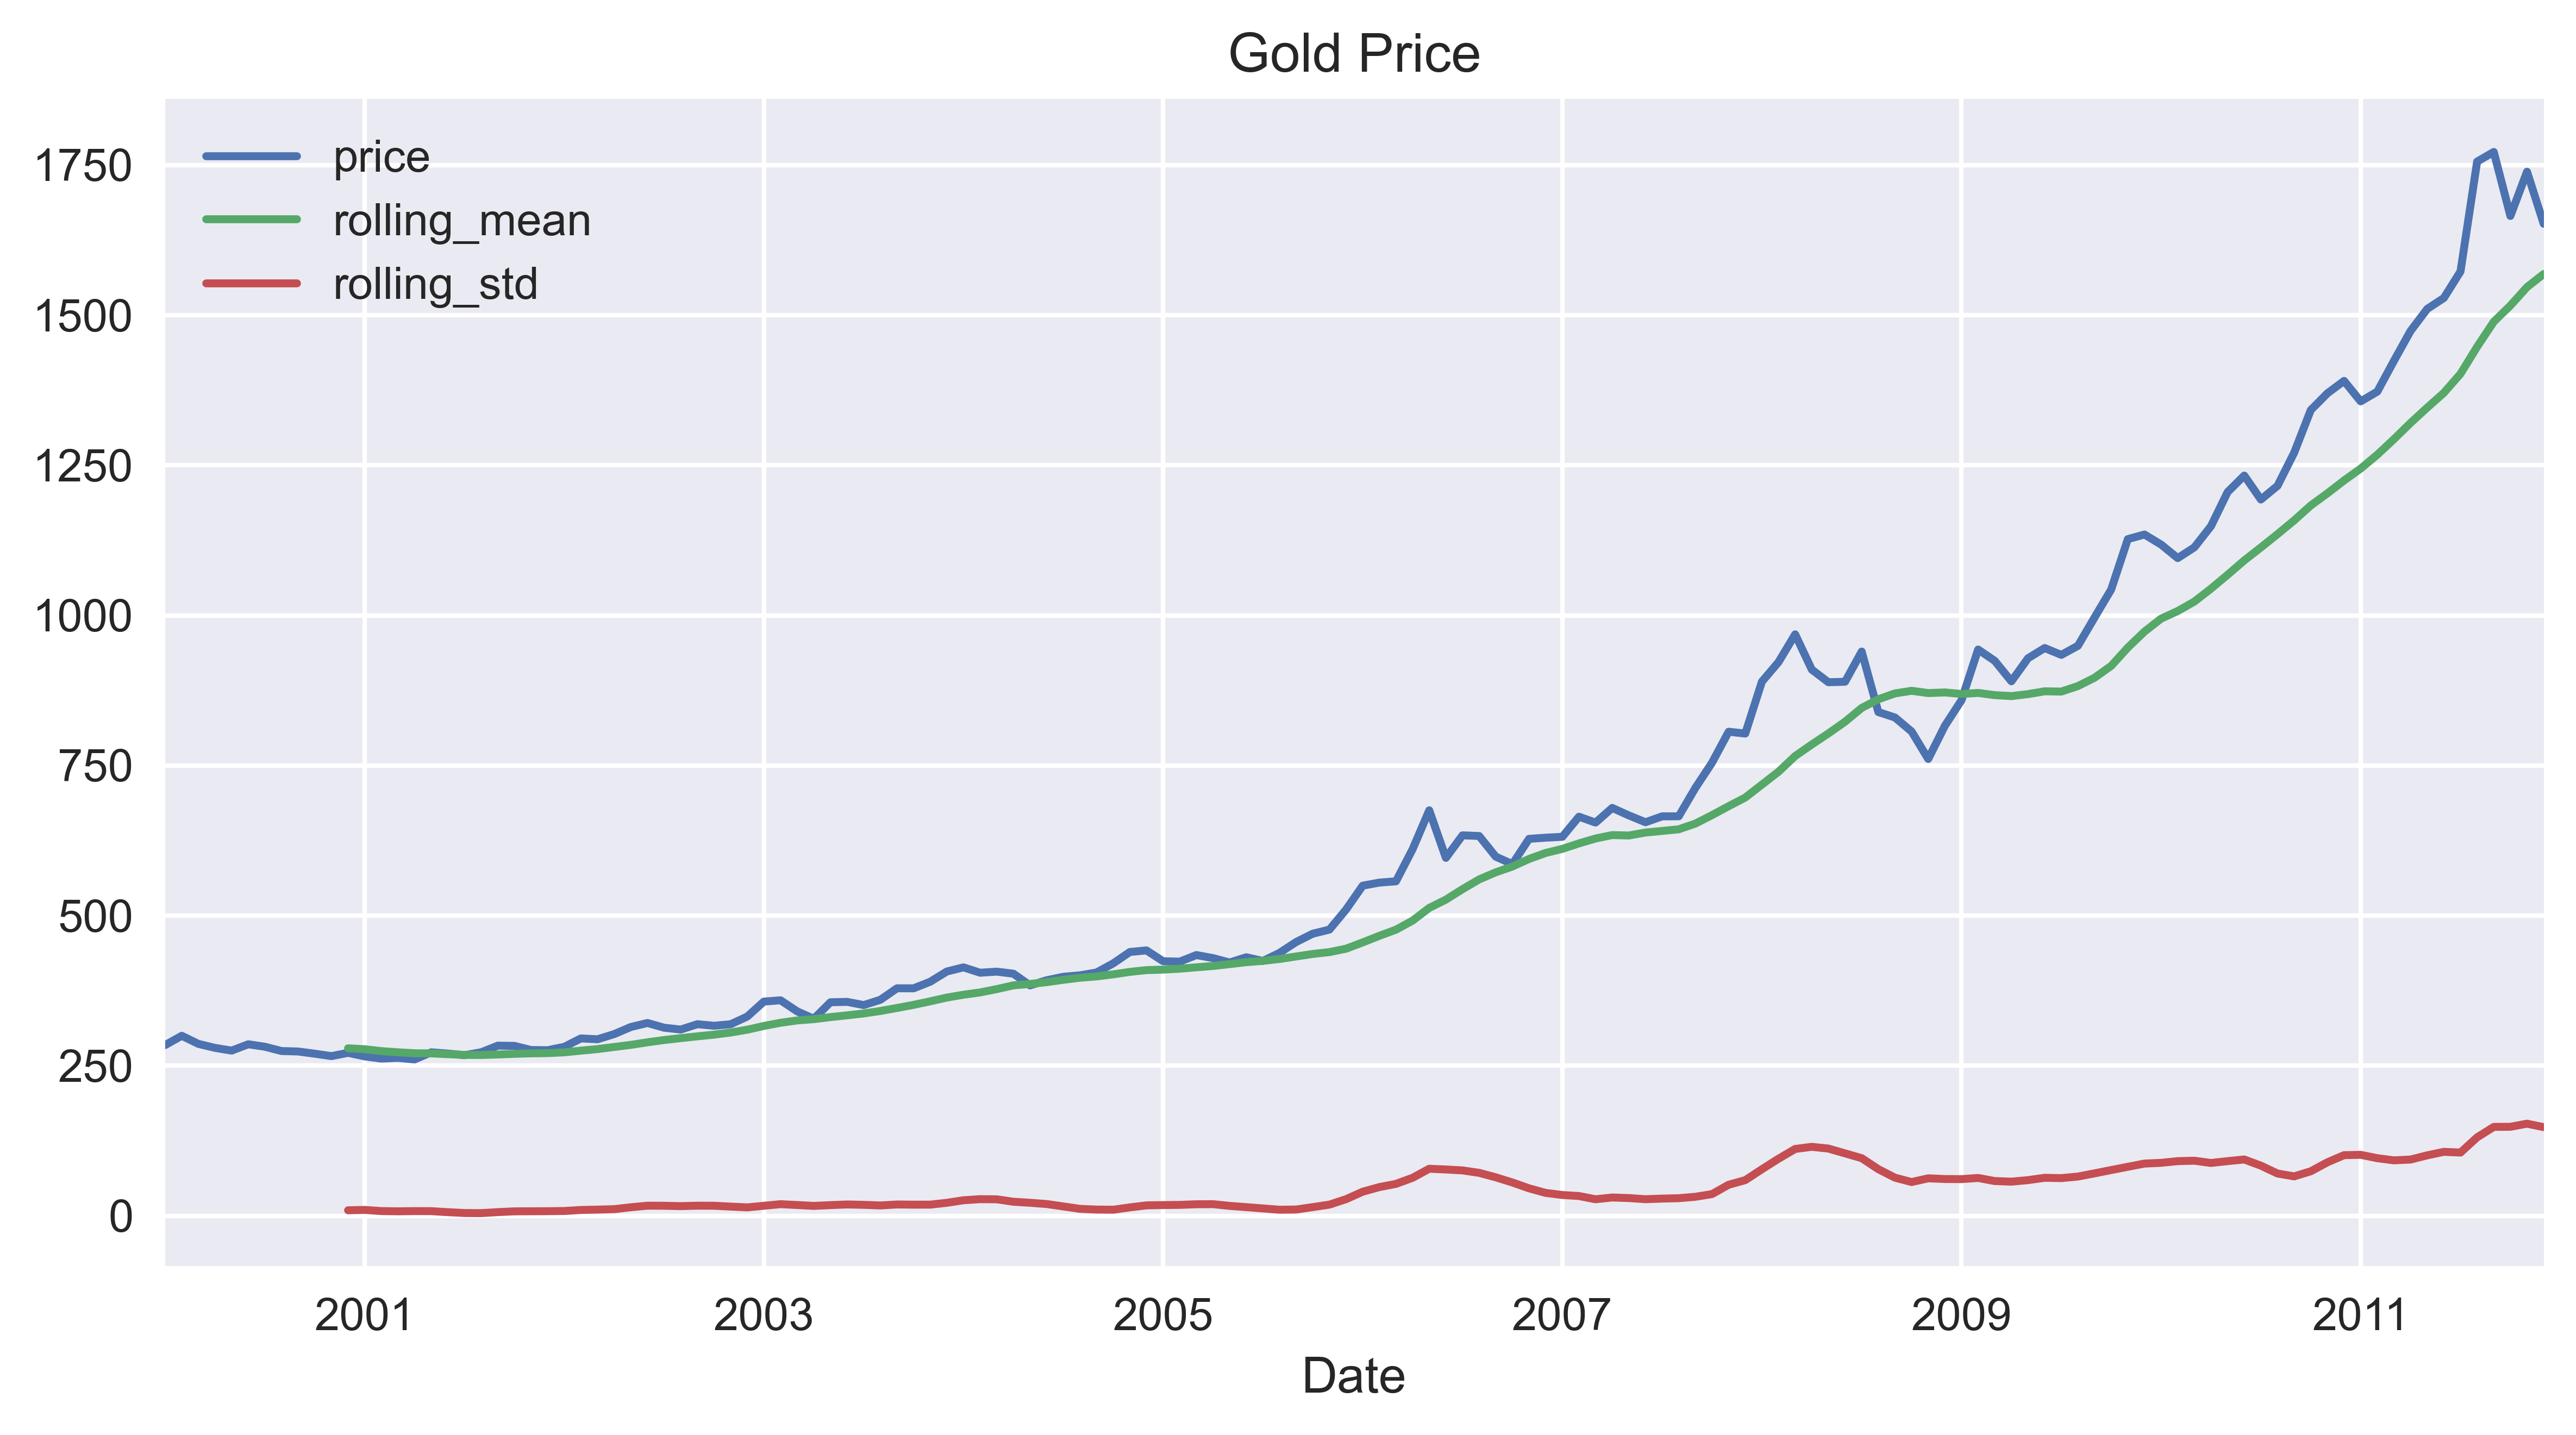

In [7]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

plt.tight_layout()
plt.show()

4. Carry out seasonal decomposition using the multiplicative model:

C:\Users\nking\AppData\Local\Temp\ipykernel_7656\820844697.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


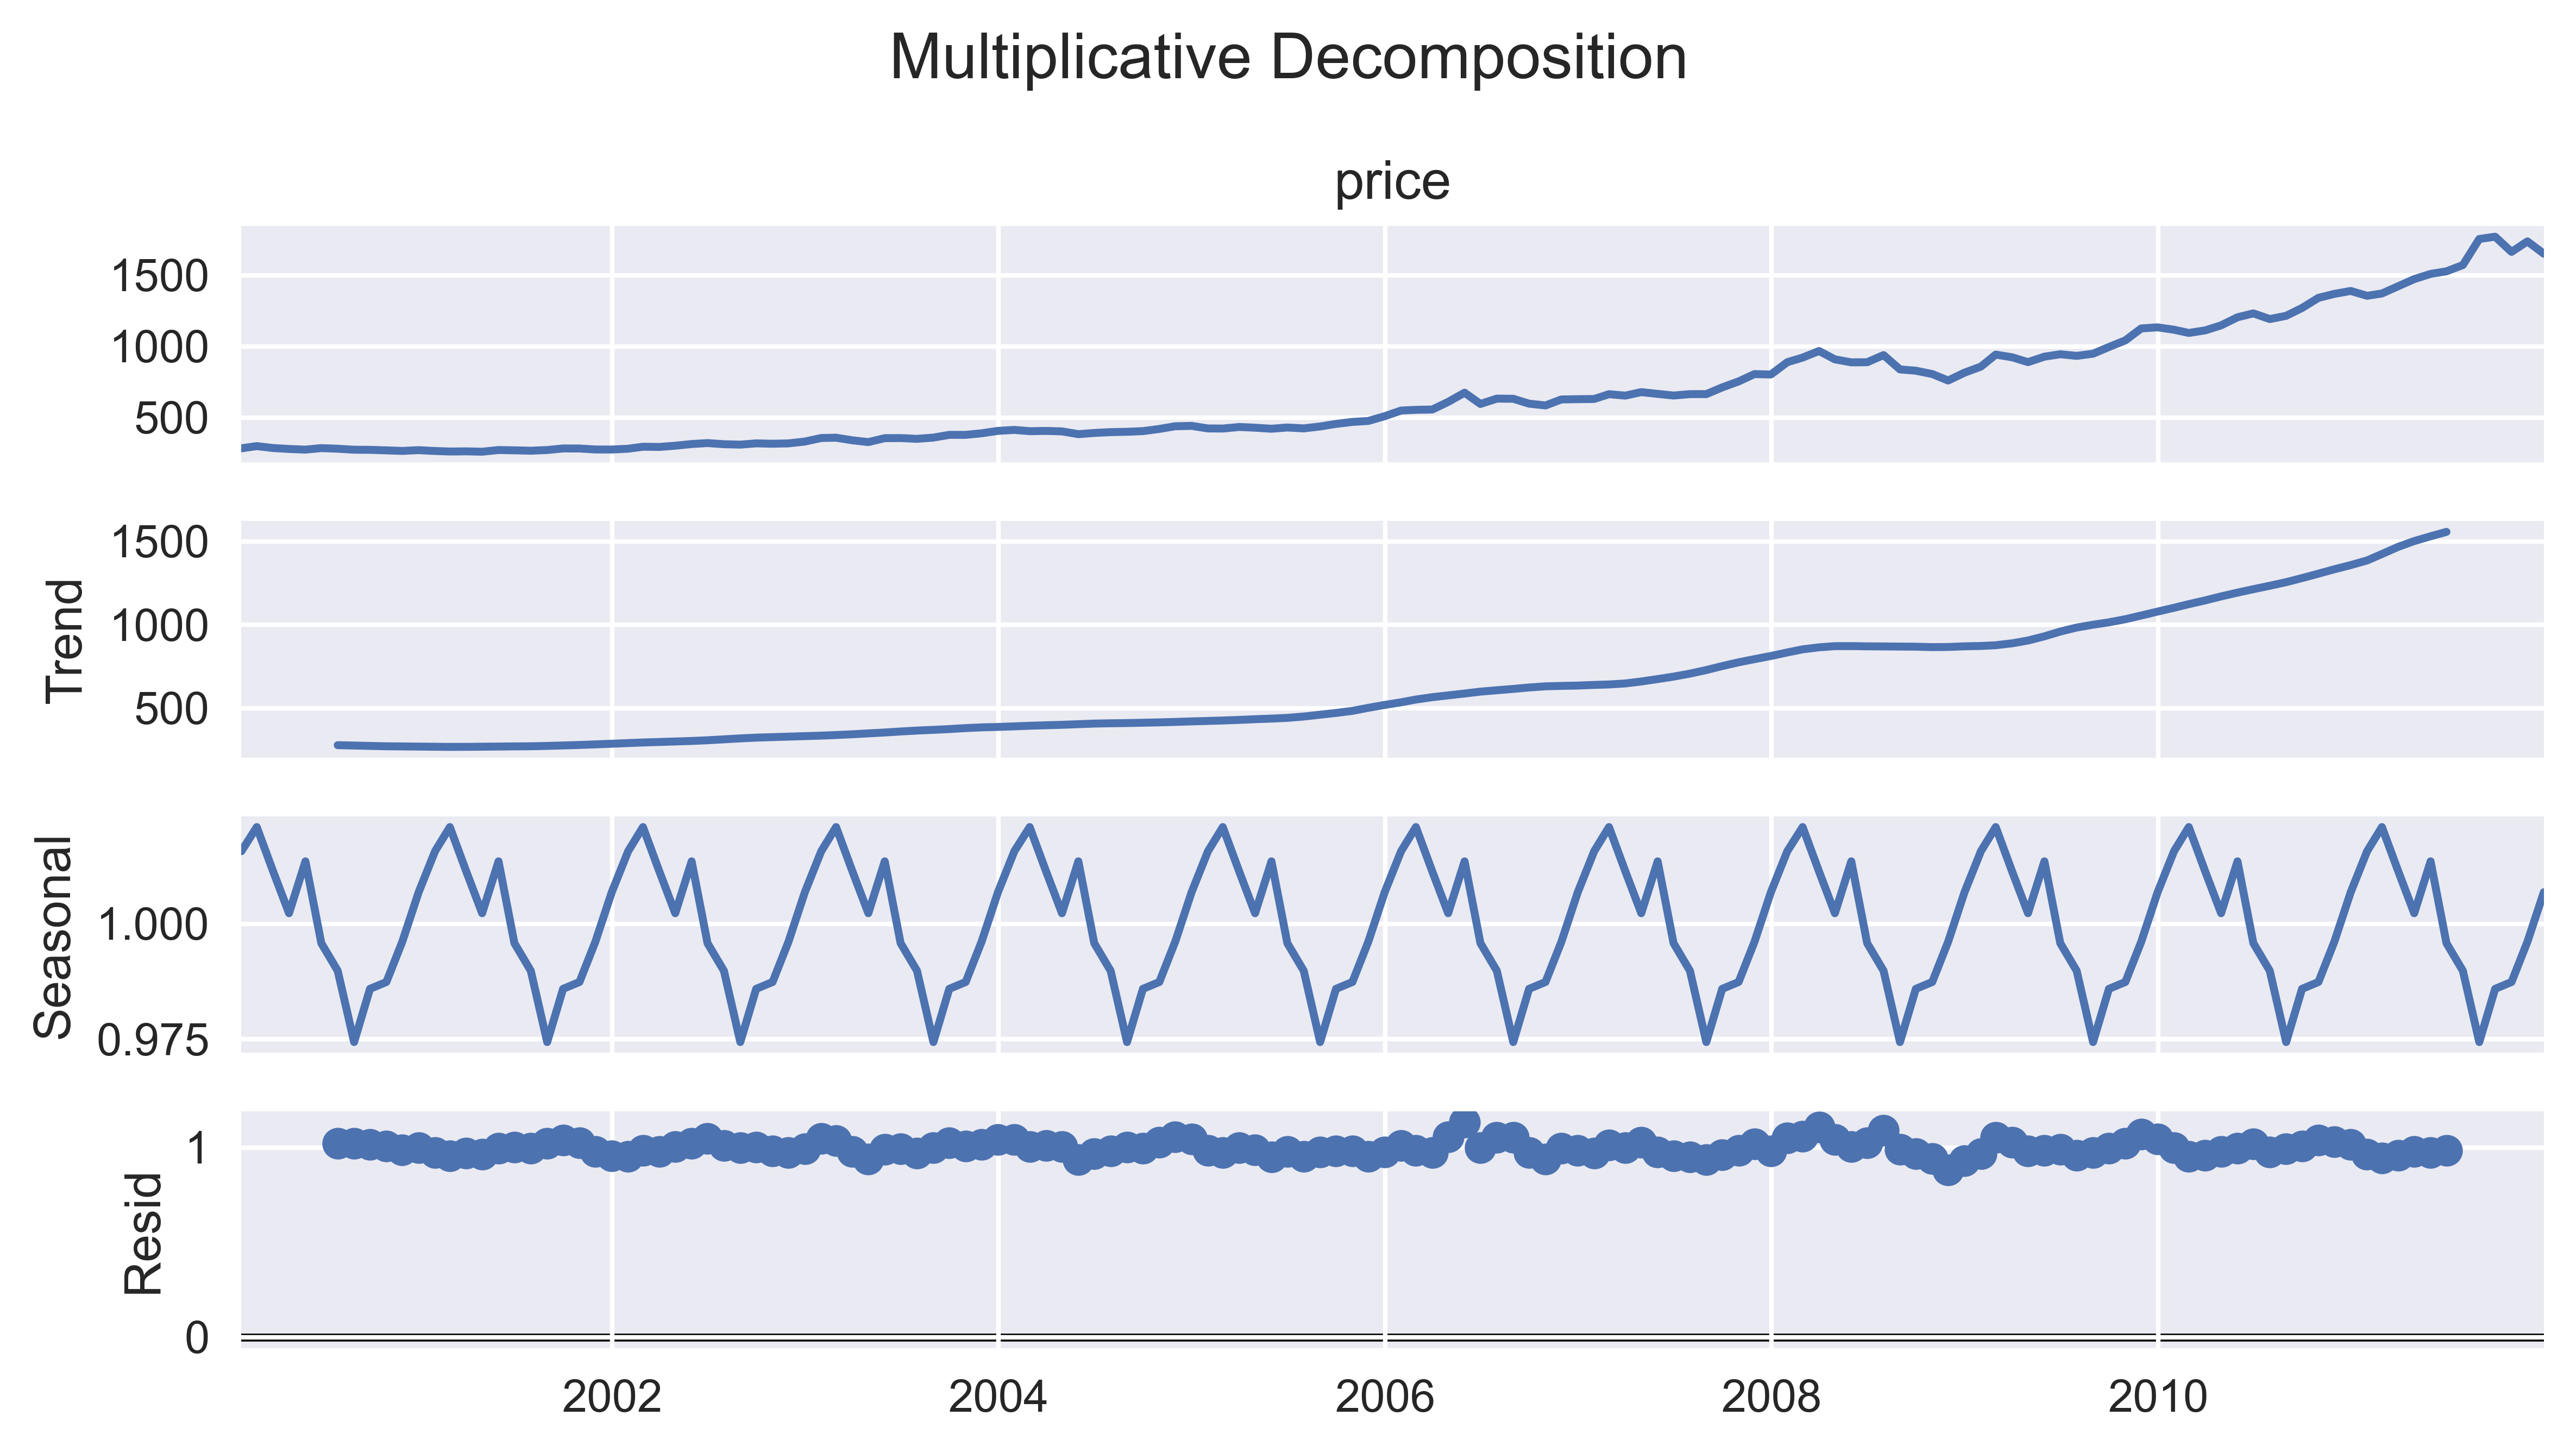

In [8]:
decomposition_results = seasonal_decompose(df.price, 
                                          model='multiplicative')
decomposition_results.plot() \
                     .suptitle('Multiplicative Decomposition',
                              fontsize=14)

plt.tight_layout()
plt.show()